Epoch 1/5: 0.5380007999139313
Epoch 2/5: 0.5349548300015908
Epoch 3/5: 0.5319943758358251
Epoch 4/5: 0.5291156993255259
Epoch 5/5: 0.5263170751179154


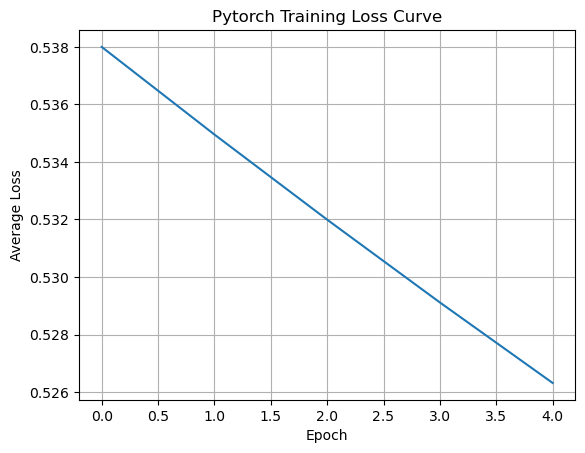

In [1]:
# New code where paramaters ARE updated once per epoch but lr needs to be reduced
import pickle as pkl
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load test params
file_path = r'C:\Users\CooperO\SYDE577\assignment-one-test-parameters.pkl'

with open(file_path, 'rb') as file:
    data = pkl.load(file)

inputs = torch.tensor(data['inputs'], dtype=torch.float64)
targets = torch.tensor(data['targets'], dtype=torch.float64)

# Define model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10, dtype=torch.float64)
        self.fc2 = nn.Linear(10, 10, dtype=torch.float64)
        self.fc3 = nn.Linear(10, 1, dtype=torch.float64)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = SimpleNet()

# Initialize weights and biases
model.fc1.weight = nn.Parameter(torch.tensor(data['w1'], dtype=torch.float64))
model.fc1.bias = nn.Parameter(torch.tensor(data['b1'], dtype=torch.float64))
model.fc2.weight = nn.Parameter(torch.tensor(data['w2'], dtype=torch.float64))
model.fc2.bias = nn.Parameter(torch.tensor(data['b2'], dtype=torch.float64))
model.fc3.weight = nn.Parameter(torch.tensor(data['w3'], dtype=torch.float64))
model.fc3.bias = nn.Parameter(torch.tensor(data['b3'], dtype=torch.float64))

# MSE loss
criterion = nn.MSELoss()

# Optimizer with learning rate of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)
                
# Training loop
epochs = 5
loss_vals = []

for epoch in range(epochs):
    optimizer.zero_grad()
    
    # Forward pass
    output = model(inputs)
    loss = criterion(output.squeeze(), targets)/2
    
    # Accumulate gradients
    loss.backward()

    # Perform a single parameter update after accumulating gradients
    optimizer.step()
    
    loss_vals.append(loss)

    print(f'Epoch {epoch+1}/{epochs}: {loss}')

# Plot the loss curve
plt.plot(range(epochs), [elem.detach().numpy() for elem in loss_vals])
plt.title('Pytorch Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()